### Upload a Lab Assignment File as a PDF file (implementation in matrix form).  Consider iris dataset.

**Linear Regression   .... y = a x  +c**

Linear regression equation: y = 0.4157554163524127x + -0.36307552131903476


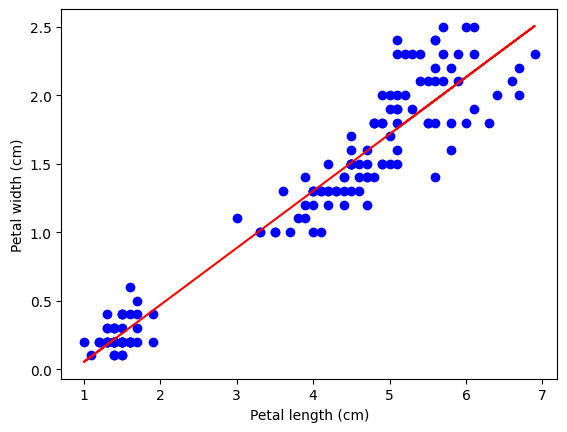

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, np.newaxis, 2]
y = iris.data[:, np.newaxis, 3]

# Add a column of ones to X for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Compute the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# The first element of coefficients is the bias term (c) and the second is the slope (a)
c, a = coefficients

print(f"Linear regression equation: y = {a[0]}x + {c[0]}")

# Plot the data and the regression line
plt.scatter(X[:, 1], y, color='b')
plt.plot(X[:, 1], a * X[:, 1] + c, color='r')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()



### **Polynomial Regression   y = a x^3 + c**

Polynomial regression equation: y = 0.008688291926676384x^3 + 0.4478897414627956


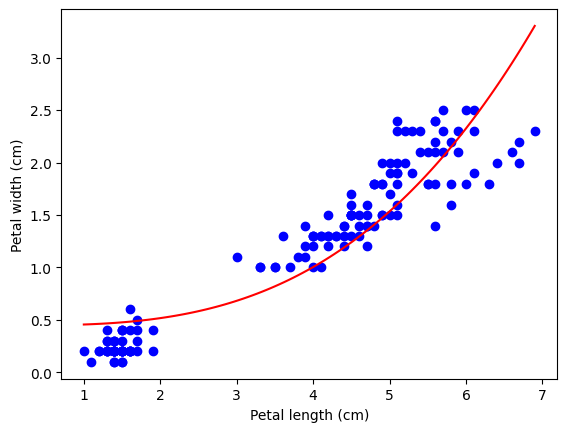

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, np.newaxis, 2]
y = iris.data[:, np.newaxis, 3]

# Create the design matrix for a cubic polynomial
X_poly = np.hstack((np.ones((X.shape[0], 1)), X**3))

# Compute the coefficients using the normal equation
coefficients = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

# The first element of coefficients is the bias term (c) and the second is the cubic coefficient (a)
c, a = coefficients[0], coefficients[1]

print(f"Polynomial regression equation: y = {a[0]}x^3 + {c[0]}")

# Plot the data and the regression line
plt.scatter(X[:, 0], y, color='b')
X_plot = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
X_plot_poly = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot**3))
y_plot = X_plot_poly.dot(coefficients)
plt.plot(X_plot, y_plot, color='r')
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.show()


### **Multiple Linear Regression y = a x1 + b x2 + c**

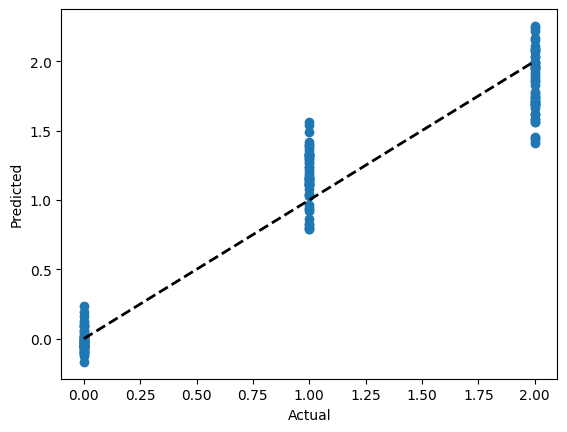

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:]  # Use the last two features as independent variables
y = iris.target

# Add a column of ones to X to represent the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Make predictions using the model
y_pred = X.dot(coefficients)

# Plot the actual and predicted values
plt.scatter(y, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


Multiple linear regression equation: y = -0.08221782098246647x1 + 0.4493761149474161x2 + -0.008995972698207955


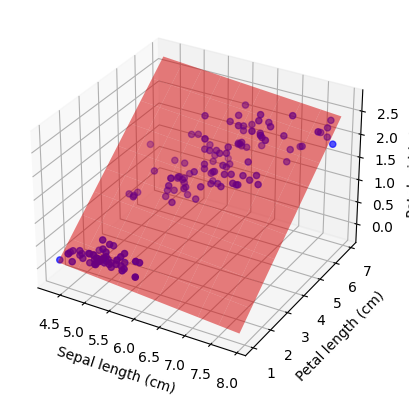

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

iris = datasets.load_iris()
X1 = iris.data[:, np.newaxis, 0]
X2 = iris.data[:, np.newaxis, 2]
y = iris.data[:, np.newaxis, 3]

# Create the design matrix for multiple linear regression
X = np.hstack((np.ones((X1.shape[0], 1)), X1, X2))

# Compute the coefficients using the normal equation
coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# The first element of coefficients is the bias term (c) and the second and third are the coefficients for X1 and X2 (a and b)
c, a, b = coefficients

print(f"Multiple linear regression equation: y = {a[0]}x1 + {b[0]}x2 + {c[0]}")

# Plot the data and the regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='b')
X1_plot, X2_plot = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))
y_plot = a * X1_plot + b * X2_plot + c
ax.plot_surface(X1_plot, X2_plot, y_plot, color='r', alpha=0.5)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Petal length (cm)')
ax.set_zlabel('Petal width (cm)')
plt.show()
